In [18]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import csv
import sklearn.covariance
import sklearn.linear_model
import scipy.stats

In [19]:
with open('best_gamma_results.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:float(item) for key,item in result.items()} for result in results]
print(results[0])
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max']
    
features = [{key:value for key,value in result.items() if key not in nonFeatureKeys} for result in results]
pd.DataFrame(features)

{'best/median': 0.501842817170391, 'contributions_exponential': 0.166666666666667, 'contributions_linear': 0.333333333333333, 'contributions_logarithmic': 0.166666666666667, 'contributions_peakvalley': 0.166666666666667, 'contributions_random': 0.166666666666667, 'gamma': 0.75, 'interactions': 6.0, 'interactions_index': 0.555555555555556, 'interactions_linear': 0.333333333333333, 'interactions_peakvalley': 0.166666666666667, 'interactions_random': 0.0, 'interactions_wave': 0.5, 'kurtosis': 2.49940505944091, 'log10_cardinality': 5.38021124171161, 'loss': 0.082430045255911, 'max': 0.551257488113351, 'median': 0.167331644335719, 'min': 0.082430045255911, 'num_parameters': 6.0, 'range': 0.316843766684631, 'skew': 1.45619827075299, 'std': 0.090898474272377}


,best/median,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,interactions,interactions_index,interactions_linear,interactions_peakvalley,interactions_random,interactions_wave,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,0.501843,0.166667,0.333333,0.166667,0.166667,0.166667,6.0,0.555556,0.333333,0.166667,0.000000,0.500000,2.499405,5.380211,6.0,0.316844,1.456198,0.090898,0.543223,1.102735
1,0.625142,0.000000,0.166667,0.166667,0.166667,0.500000,8.0,0.740741,0.125000,0.250000,0.375000,0.250000,0.576591,6.885361,6.0,0.424552,0.970736,0.095528,0.301695,0.483126
2,0.748170,0.000000,0.250000,0.625000,0.125000,0.000000,14.0,0.729167,0.285714,0.071429,0.214286,0.428571,3.868940,9.350248,8.0,0.311721,1.886165,0.062880,0.316320,0.423040
3,0.831949,0.181818,0.090909,0.363636,0.181818,0.181818,31.0,0.853994,0.290323,0.225806,0.225806,0.258065,2.734882,11.395906,11.0,0.366705,1.607069,0.053092,0.190779,0.229582
4,0.835118,0.083333,0.166667,0.333333,0.250000,0.166667,44.0,1.018519,0.272727,0.227273,0.204545,0.295455,2.348833,11.320186,12.0,0.364028,1.472461,0.043879,0.146246,0.175225
5,0.879424,0.307692,0.076923,0.153846,0.153846,0.307692,49.0,0.966469,0.224490,0.265306,0.265306,0.244898,3.130170,14.395906,13.0,0.348584,1.715178,0.038325,0.135610,0.154195
6,0.539456,0.666667,0.333333,0.000000,0.000000,0.000000,4.0,1.481481,0.000000,0.250000,0.500000,0.250000,5.177012,2.903090,3.0,0.345033,2.345293,0.129498,1.672140,3.212199
7,0.665941,0.285714,0.285714,0.428571,0.000000,0.000000,13.0,0.884354,0.461538,0.153846,0.230769,0.153846,2.757407,7.651278,7.0,0.340013,1.655501,0.082259,0.399140,0.601888
8,0.905611,0.230769,0.230769,0.230769,0.307692,0.000000,48.0,0.946746,0.395833,0.250000,0.208333,0.145833,3.439412,13.411700,13.0,0.409977,1.798168,0.041159,0.122633,0.135460
9,0.695433,0.285714,0.285714,0.000000,0.428571,0.000000,16.0,1.088435,0.312500,0.250000,0.187500,0.250000,3.904869,6.651278,7.0,0.322523,1.763438,0.067449,0.354827,0.509860


In [20]:
gammas = [result['gamma'] for result in results]
pd.DataFrame(gammas)

,0
0,0.75
1,0.70
2,1.65
3,1.05
4,1.20
5,1.30
6,0.90
7,0.70
8,1.25
9,0.90


In [21]:
labels = sorted(features[0].keys())

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, gammas)[0]
    correlations.append({'name': label, 'correlation': correlation})

correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

,correlation,name
0,0.529213,skew
1,0.512642,kurtosis
2,0.360687,best/median
3,0.178073,num_parameters
4,0.176940,interactions
5,0.162910,log10_cardinality
6,-0.160895,interactions_peakvalley
7,-0.156730,stdvsmin
8,-0.146124,std
9,0.128214,interactions_wave


<IPython.core.display.Javascript object>


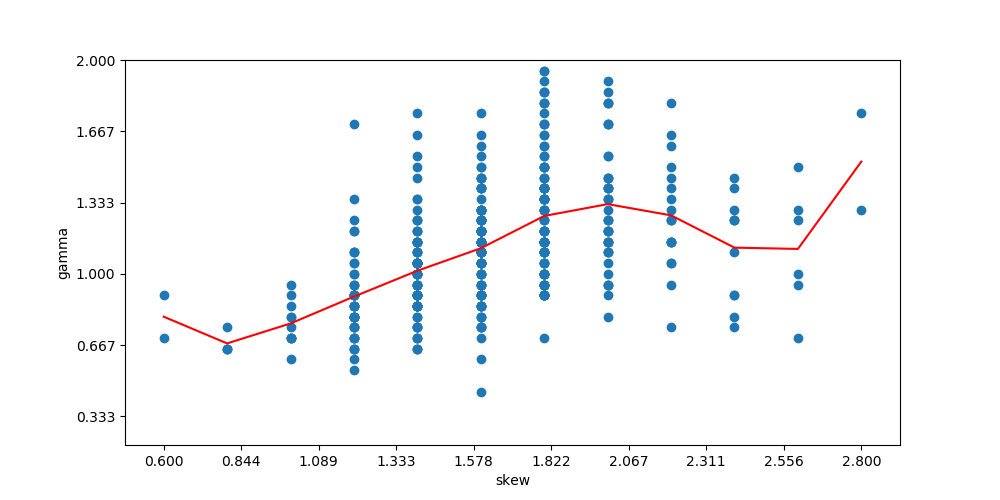

In [22]:
def plot(variable, rounding):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['gamma'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    gammas = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueGammas = [gammas[i] for i in range(len(gammas)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueGammas))
    
    
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('gamma')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,3,10))
    fig.set_ylim(0.2, 2.0)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, gammas)
    fig.plot(meanValues, means, 'r')
    return fig
plot('skew', 0.2)

<IPython.core.display.Javascript object>


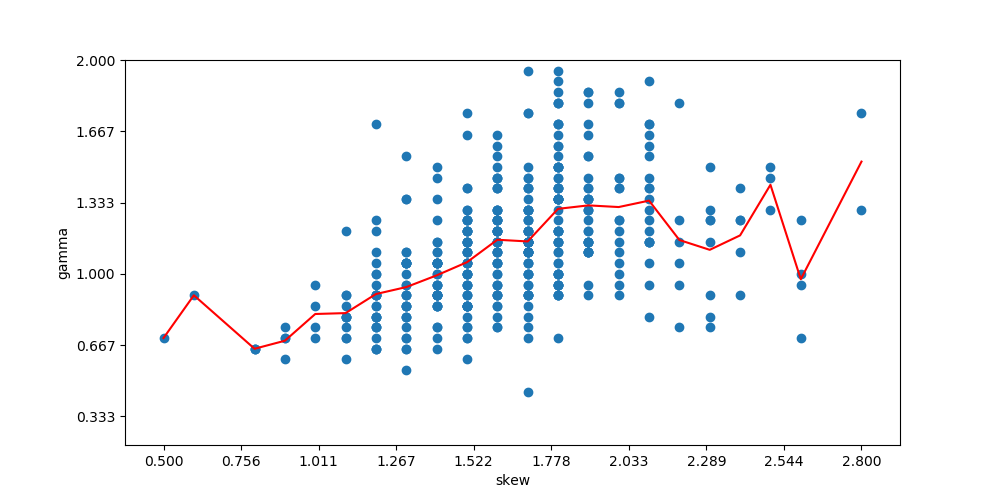

In [23]:
plot('skew', 0.1)

<IPython.core.display.Javascript object>


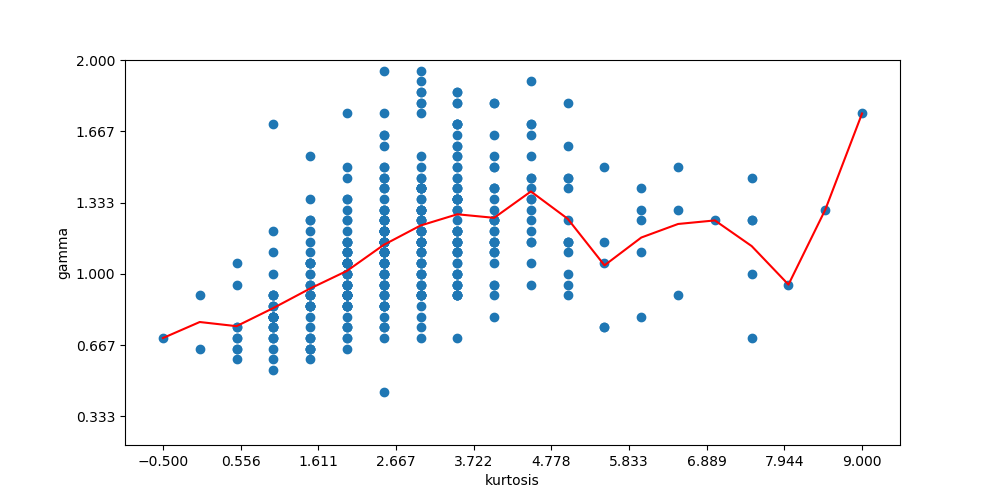

In [24]:
plot('kurtosis', 0.5)

<IPython.core.display.Javascript object>


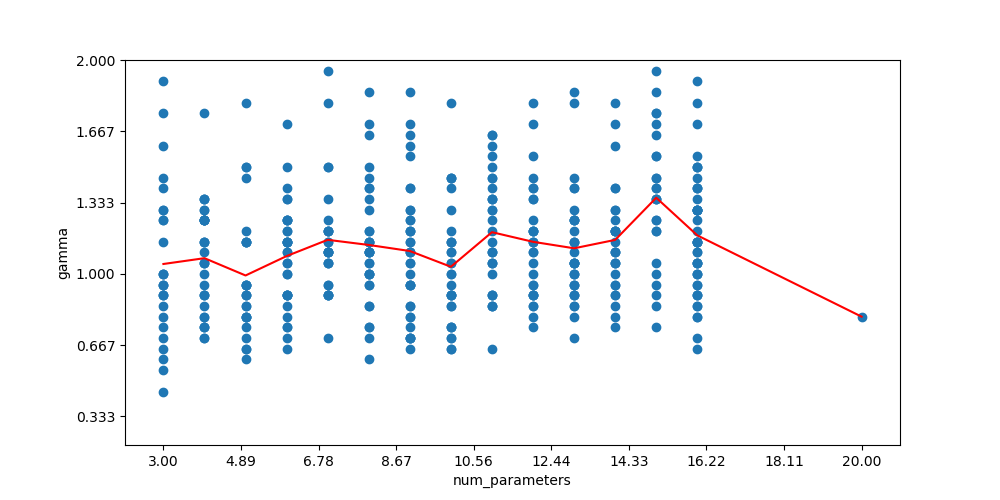

In [25]:
plot('num_parameters', 1.0)

<IPython.core.display.Javascript object>


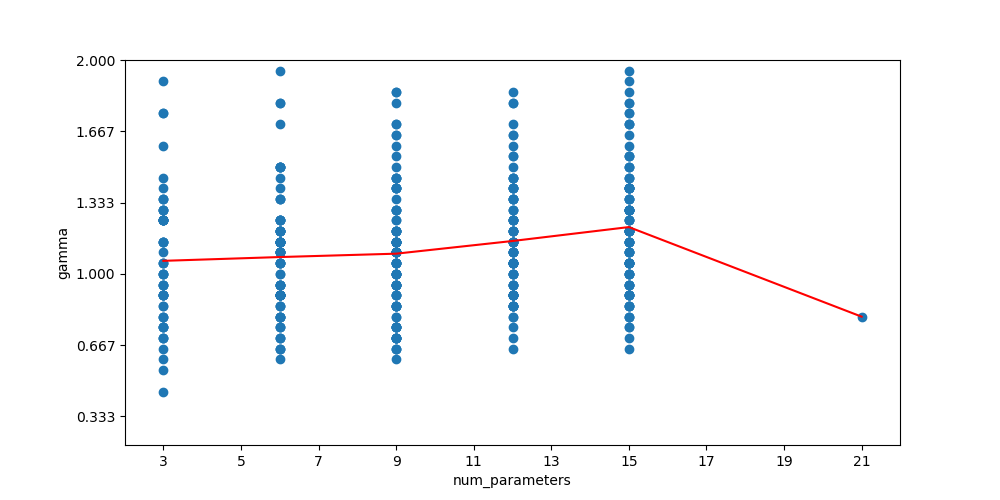

In [26]:
plot('num_parameters', 3.0)

<IPython.core.display.Javascript object>


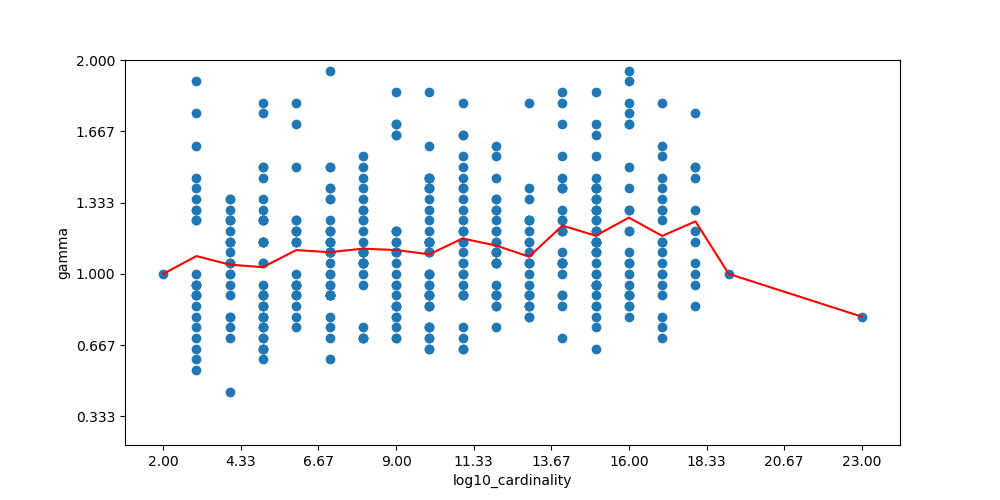

In [27]:
plot('log10_cardinality', 1.0)

<IPython.core.display.Javascript object>


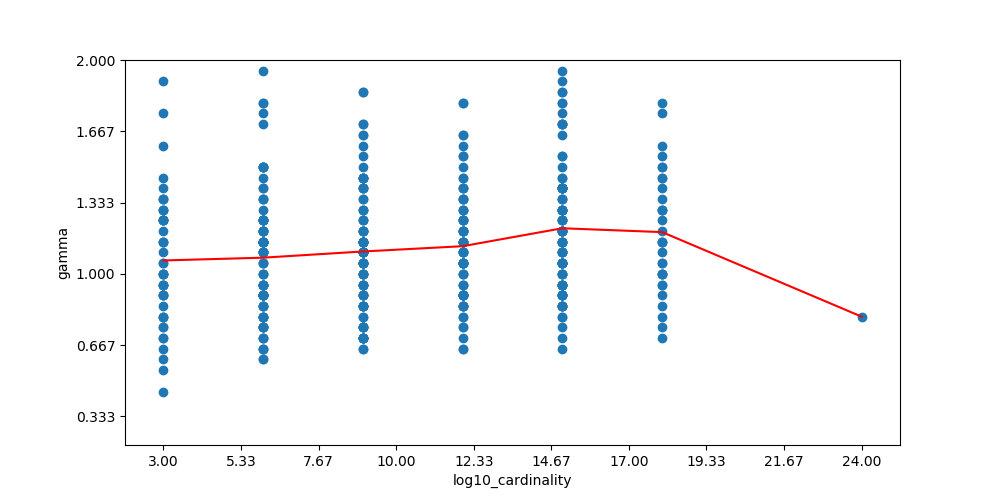

In [28]:
plot('log10_cardinality', 3.0)

<IPython.core.display.Javascript object>


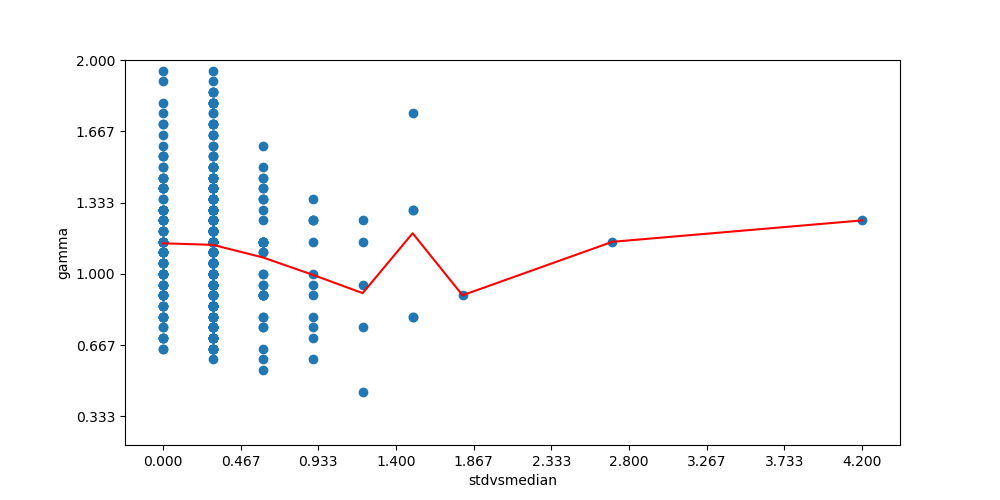

In [29]:
plot('stdvsmedian', 0.3)

In [30]:
fields = sorted(features[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field]
vectors = [[result[f] for f in fields] for result in features]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(gammas))
deviations = numpy.std(vectors, axis=0)

In [31]:
rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

,best/median,field,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,,best/median,1,63,64,35,2,-73,-66,-72
1,1,kurtosis,,-25,-25,-8,96,16,28,21
2,63,log10_cardinality,-25,,98,8,-26,-72,-52,-46
3,64,num_parameters,-25,98,,9,-27,-75,-54,-48
4,35,range,-8,8,9,,-6,13,-20,-19
5,2,skew,96,-26,-27,-6,,23,34,26
6,-73,std,16,-72,-75,13,23,,78,73
7,-66,stdvsmedian,28,-52,-54,-20,34,78,,95
8,-72,stdvsmin,21,-46,-48,-19,26,73,95,


In [32]:
predictors = ['skew', 'log10_cardinality', 'stdvsmedian']

filteredResults = results
filteredResults = [result for result in filteredResults if result['skew'] < 2.5]
filteredResults = [result for result in filteredResults if result['log10_cardinality'] < 18]
filteredResults = [result for result in filteredResults if result['stdvsmedian'] < 1.4]

vectors = [[result[predictor] for predictor in predictors] for result in filteredResults]
gammas = [result['gamma'] for result in filteredResults]



model = sklearn.linear_model.Ridge(alpha = .5)
model.fit(vectors, gammas)


weights = {predictors[i]: model.coef_[i] for i in range(len(predictors))}
weights['intercept'] = model.intercept_
pd.DataFrame([weights])

,intercept,log10_cardinality,skew,stdvsmedian
0,0.231779,0.011054,0.533219,-0.3043


In [33]:
def roundPrecision(number, precision=3):
    """ Rounds the given floating point number to a certain precision, for output."""
    return float(('{:.' + str(precision) + 'E}').format(number))


equation = "Gamma = " + str(roundPrecision(weights['intercept'], 1))
for predictor in predictors:
    equation += " + " + str(predictor) + " * " + str(roundPrecision(weights[predictor], 1))
print(equation)

Gamma = 0.23 + skew * 0.53 + log10_cardinality * 0.011 + stdvsmedian * -0.3
